In [54]:
import wave, struct
import numpy as np
import scipy.signal as ss
import matplotlib.pyplot as plt
from tqdm import tqdm

from tonegen import savemono, savestereo

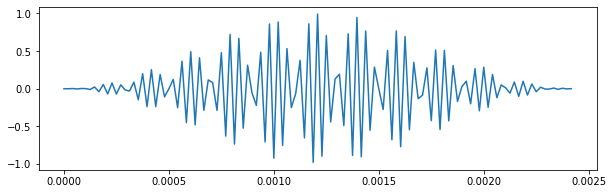

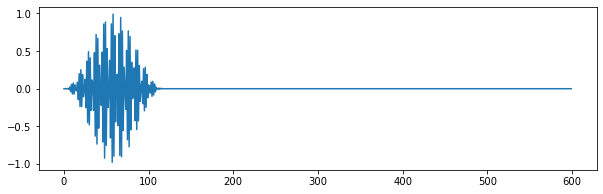

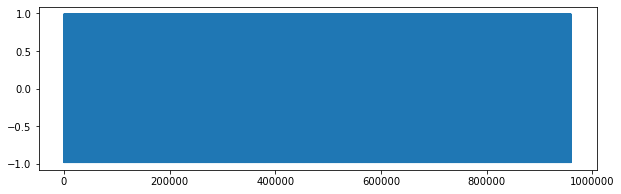

100%|██████████| 960000/960000 [00:01<00:00, 494695.24it/s]


In [81]:
fs = 48000
N = 13*9
t = np.arange(N) / fs
# probe = ss.chirp(t, 21e3, 22e3, np.max(t))
f = 21.5e3
probe = np.cos( 2 * np.pi * f * t)
# probe *= ss.get_window(('tukey', 1), N)
probe *= ss.get_window('hann', N)

# barker = np.array([1, 1, 1, 1, 1, -1, -1, 1, 1, -1, 1, -1, 1])
# barker = np.repeat(barker, 9)
# plt.plot(barker)
# probe *= barker

plt.figure(figsize=(10,3))
plt.plot(t, probe)
plt.show()

duration = 20
probe_freq = 80
probe_period = fs//probe_freq
probe_pad = np.pad(probe, (0, probe_period-len(probe)))

plt.figure(figsize=(10,3))
plt.plot(probe_pad)
plt.show()

tx = np.tile(probe_pad, duration*fs//len(probe_pad))

plt.figure(figsize=(10,3))
plt.plot(tx)
plt.show()

savestereo('./audio/probe_tx.wav', tx, np.zeros_like(tx), fs)
np.save('probe_tx', tx)
np.save('probe', probe)